In [1017]:
'''Predicting Pulsar Stars'''
#binary classification algorithm

#Load Models
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

#shows visualization in line -> replaces plt.show
%matplotlib inline

In [1018]:
#IMPORTING DATA
data_train = pd.read_csv('Datasets/pulsar_star_dataset/pulsar_data_train.csv')
data_test = pd.read_csv('Datasets/pulsar_star_dataset/pulsar_data_test.csv')



In [1019]:
#TRAINING SET DATA TREATMENT
#demonstrates the data shape: number fo entries(rows) and columns
print("---------------------------------------------------")
print("Dataset's Shape: ", data_train.shape)
print("--------------------------------------------------- \n")

print(data_train.info())

---------------------------------------------------
Dataset's Shape:  (12528, 9)
--------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float

In [1020]:
#As all columns are relevant datapoints, none are droped 
data_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


---------------------------------------------------
Null Values:

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64
--------------------------------------------------- 



<AxesSubplot:>

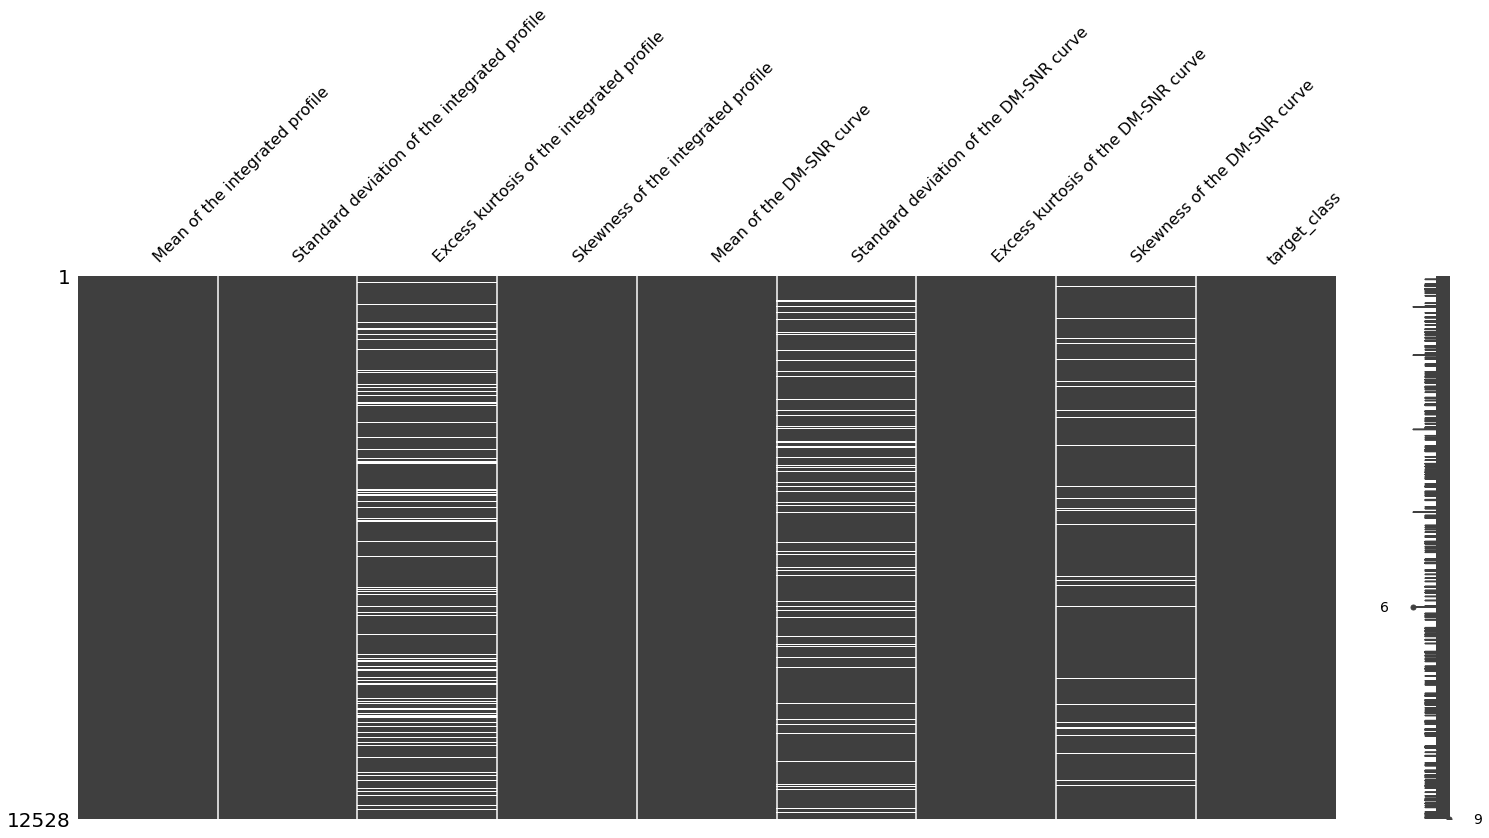

In [1021]:
#Checks if variables have any null values
print("---------------------------------------------------")
print("Null Values:\n")
print(data_train.isna().sum())
print("--------------------------------------------------- \n")

#demonstrates Nan values within the dataset
#white strips represents Nan values in a column
msno.matrix(data_train)

In [1022]:
#drops rows with Nan values
data_train.dropna(inplace=True)

#demonstrates the data shape to confirm the treated data has at least 1000 entries
print("---------------------------------------------------")
print("Dataset's Shape: ", data_train.shape)
print("--------------------------------------------------- \n")

data_train.head()

---------------------------------------------------
Dataset's Shape:  (9273, 9)
--------------------------------------------------- 



,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


---------------------------------------------------
Null Values:

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64
--------------------------------------------------- 



<AxesSubplot:>

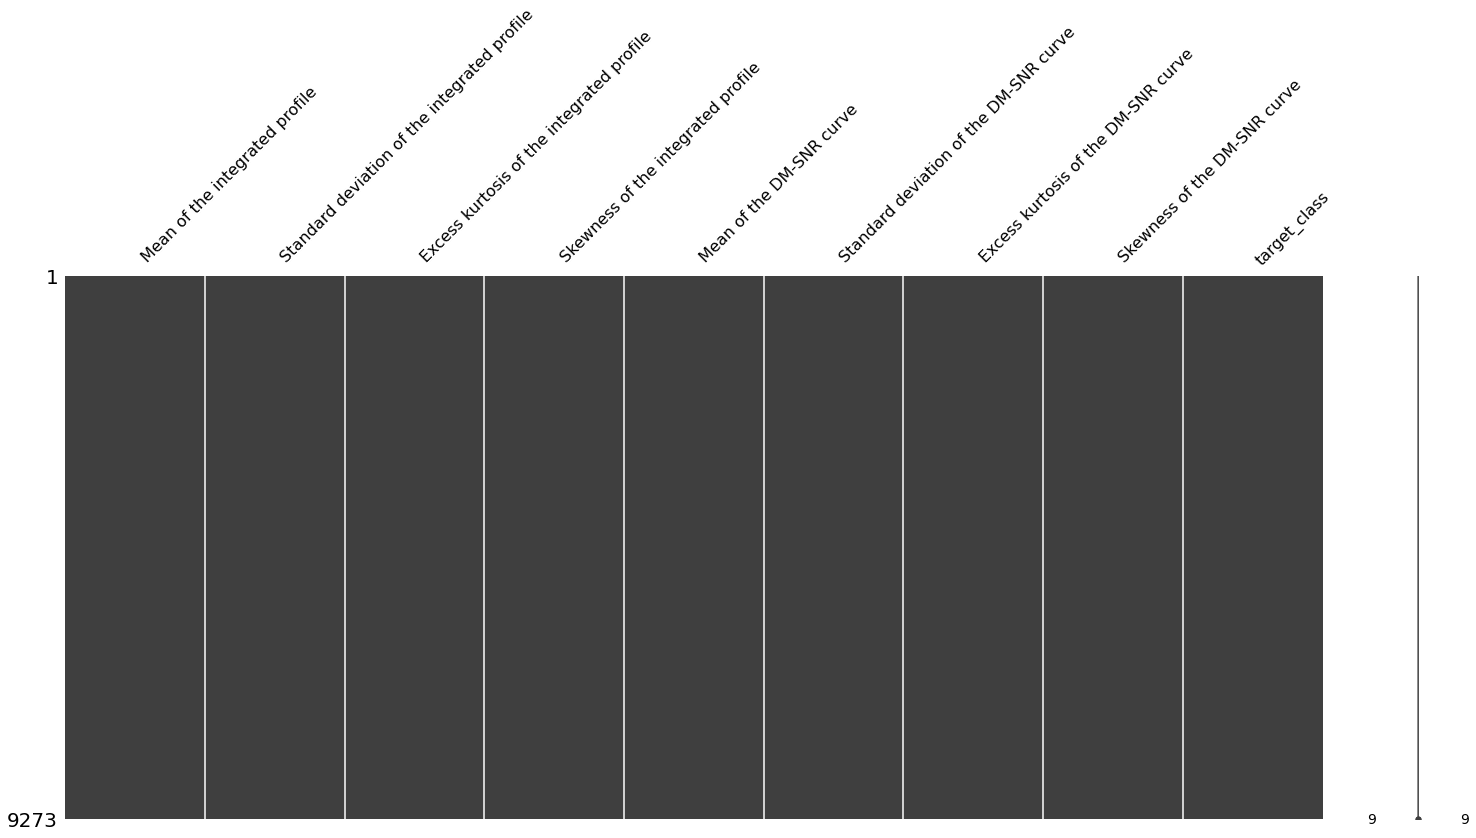

In [1023]:
#Checks if variables have any null values
print("---------------------------------------------------")
print("Null Values:\n")
print(data_train.isna().sum())
print("--------------------------------------------------- \n")

#demonstrates Nan values within the dataset
#lack of white strips represents the lack of Nan values
msno.matrix(data_train)

In [1024]:
#As target_class is already binary, theres not need to transform it into categortical values
#gives general infor about the data
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,9273.0,111.133750,25.686405,6.187500,100.984375,115.234375,127.328125,189.734375
Standard deviation of the integrated profile,9273.0,46.514053,6.781320,24.772042,42.398382,46.895026,51.001785,91.808628
Excess kurtosis of the integrated profile,9273.0,0.479546,1.071155,-1.738021,0.024497,0.223858,0.472066,8.069522
Skewness of the integrated profile,9273.0,1.790673,6.286567,-1.791886,-0.188021,0.202884,0.930710,68.101622
Mean of the DM-SNR curve,9273.0,12.735359,29.766782,0.213211,1.910535,2.797659,5.459866,211.948997
Standard deviation of the DM-SNR curve,9273.0,26.327860,19.542634,7.370432,14.376641,18.435186,28.387019,110.642211
Excess kurtosis of the DM-SNR curve,9273.0,8.327933,4.549914,-2.636857,5.788817,8.427475,10.721934,34.539844
Skewness of the DM-SNR curve,9273.0,105.783345,108.166669,-1.976976,34.917943,83.151969,139.770330,1191.000837
target_class,9273.0,0.091664,0.288567,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='target_class', ylabel='count'>

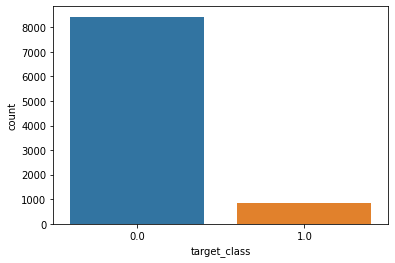

In [1025]:
#quantifies how many pulsar stars exist in the training set
sns.countplot(x=data_train['target_class'],label="pulsar_star")

In [1026]:
#FEATURE SELECTION
#finds correlations between data
data_corr = data_train.corr()
data_corr.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.554197,-0.872497,-0.734920,-0.299984,-0.307431,0.236010,0.146103,-0.675819
Standard deviation of the integrated profile,0.554197,1.000000,-0.528370,-0.542560,-0.011061,-0.059486,0.036907,0.030959,-0.368223
Excess kurtosis of the integrated profile,-0.872497,-0.528370,1.000000,0.944715,0.421126,0.436362,-0.344571,-0.216748,0.790866
Skewness of the integrated profile,-0.734920,-0.542560,0.944715,1.000000,0.415570,0.415902,-0.328328,-0.204109,0.704743
Mean of the DM-SNR curve,-0.299984,-0.011061,0.421126,0.415570,1.000000,0.796449,-0.614526,-0.353186,0.407043


<AxesSubplot:>

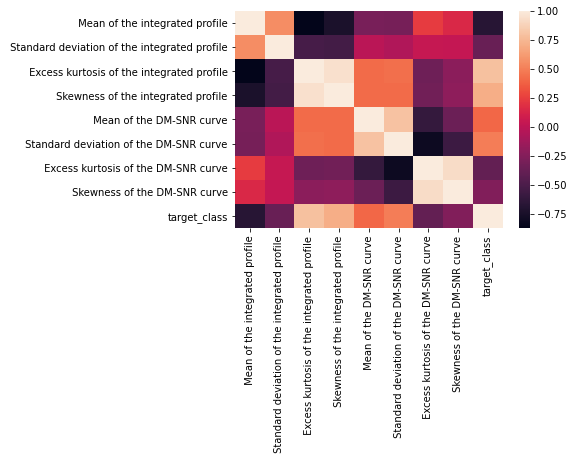

In [1027]:
#heatmap analyses the feature correlation
plt.figure()
sns.heatmap(data_corr)

<AxesSubplot:>

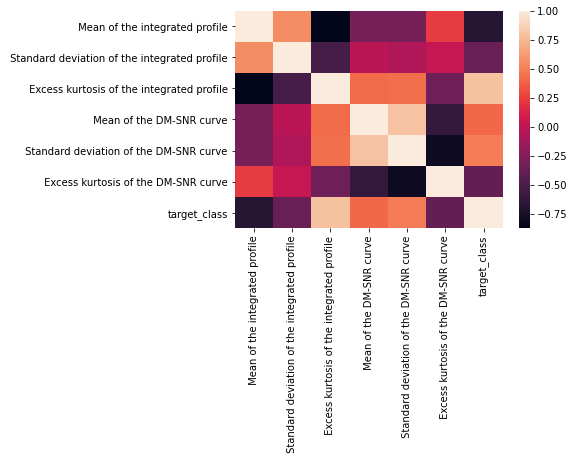

In [1028]:
#cheecks and eliminates one of the features that have a correlation of over .85
corr_columns = np.full((data_corr.shape[0],), True, dtype=bool)

for i in range(data_corr.shape[0]):
    for j in range(i+1, data_corr.shape[0]):
        if data_corr.iloc[i,j] >= 0.85:
            if corr_columns[j]:
                corr_columns[j] = False

selected_columns = data_train.columns[corr_columns]
dataf_train = data_train[selected_columns]

#To check there are no correlation between features with values over .85
data_corr = dataf_train.corr()

plt.figure()
sns.heatmap(data_corr)

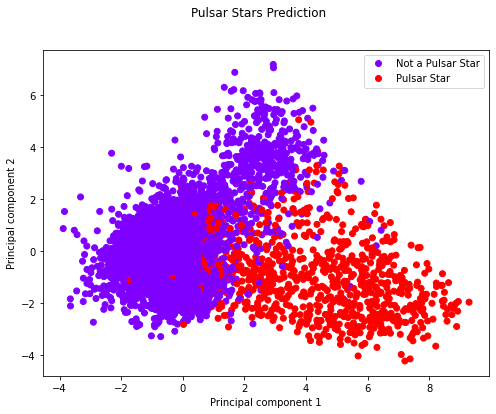

In [1029]:
#Defining variables
X = dataf_train.iloc[:,0:-1].values
y = pd.DataFrame(dataf_train.iloc[:,-1].values, columns=['target_class'])


#Scale X values to remove mean and improve accuracy
X_std = StandardScaler().fit_transform(X)

#PCA
#https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data=principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)

#PCA_Plot
plt.figure(figsize=(8,6))
labels = ["Not a Pulsar Star","Pulsar Star"]
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=labels)
plt.suptitle("Pulsar Stars Prediction")
scatter = plt.scatter(data=finalDf, x="principal component 1", y="principal component 2", c="target_class",cmap='rainbow', label = labels)




In [1033]:
#TESTING SET DATA TREATMENT
#no data treatment is necessary as the testing set has a correct data type and doesnt have any Nan values
 
print("---------------------------------------------------")
print("Dataset's Shape: ", data_test.shape)

print("--------------------------------------------------- \n")
print("Null Values:\n")
print(data_train.isna().sum())

print("--------------------------------------------------- \n")
print("Data Info:\n")
print(data_train.info())

---------------------------------------------------
Dataset's Shape:  (5370, 9)
--------------------------------------------------- 

Null Values:

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64
--------------------------------------------------- 

Data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                927

In [ ]:
#LEARNING MODELS